# Data Wrangling WeRateDogs Twitter Data

# Gathering Data

In [257]:
#importing required librries
import pandas as pd
import numpy as np
import requests
import os
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [258]:
sns.set_style()

## Reading from local file

In [259]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Downloading from the internet

In [260]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv'
response = requests.get(url)

#Checking the success of the response
response

<Response [200]>

In [261]:
#Writing the content into the file
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

#Checking that the file has been saved successfully
os.listdir('.')

['.ipynb_checkpoints',
 'act_report.docx',
 'days.png',
 'hours.png',
 'hours_varying.png',
 'image-predictions.tsv',
 'image_precictions',
 'report.ipynb',
 'tweet-json copy',
 'tweet-json.zip',
 'tweet_json.txt',
 'twitter-api.rtf',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'types.png',
 'wrangle_act.ipynb',
 'wrangle_act_draft.ipynb',
 'wrangle_report.docx',
 '~$angle_report.docx',
 '~$t_report.docx']

In [262]:
image_predictions_df = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


## Using APIs

In [263]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [264]:
#first downloading it and atoring it into the directory
json_url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(json_url)

file_name = 'tweet_json.txt'
if not os.path.isfile(file_name):
    with open(file_name,mode='wb') as file:
        file.write(response.content)
os.listdir('.')

['.ipynb_checkpoints',
 'act_report.docx',
 'days.png',
 'hours.png',
 'hours_varying.png',
 'image-predictions.tsv',
 'image_precictions',
 'report.ipynb',
 'tweet-json copy',
 'tweet-json.zip',
 'tweet_json.txt',
 'twitter-api.rtf',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'types.png',
 'wrangle_act.ipynb',
 'wrangle_act_draft.ipynb',
 'wrangle_report.docx',
 '~$angle_report.docx',
 '~$t_report.docx']

In [265]:
#Exploring the file
df_list = []

with open(file_name,encoding='utf-8',mode='r') as file:
    for line in file:
        df_list.append(json.loads(line))
        
api_df = pd.DataFrame(df_list)
api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


# Assessing Data

## `archive_df`

### Visual Assesment

In [266]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [267]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [268]:
archive_df[~archive_df['in_reply_to_status_id'].isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


### Programmatic Assesment

In [269]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [270]:
archive_df[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  floofer  None    None        1
       None     None    puppo       1
dtype: int64

In [271]:
sum(archive_df.duplicated())

0

In [272]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Eugene       1
Nico         1
Joey         1
Cuddles      1
Eriq         1
Name: name, Length: 957, dtype: int64

In [273]:
archive_df[['rating_numerator','rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    558
11                10                    463
10                10                    461
13                10                    351
9                 10                    156
8                 10                    102
7                 10                     54
14                10                     54
5                 10                     37
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
1                 10                      8
4                 20                      2
15                10                      2
75                10                      2
9                 11                      2
420               10                      2
0                 10                      2
7                 11                      1
11                15                   

In [274]:
archive_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [275]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [276]:
archive_df[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  floofer  None    None        1
       None     None    puppo       1
dtype: int64

### `image_predictions_df`

### Visual Assesment

In [277]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [278]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,dogsled,0.426494,False,cocker_spaniel,0.073101,True,Chihuahua,0.070323,True
429,674265582246694913,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1,slug,0.998075,False,ice_lolly,0.000984,False,leafhopper,0.000097,False
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
140,668544745690562560,https://pbs.twimg.com/media/CUcl5jeWsAA6ufS.jpg,1,bearskin,0.427870,False,bow,0.258858,False,panpipe,0.021563,False
793,690735892932222976,https://pbs.twimg.com/media/CZX8nyeVAAEstKM.jpg,1,golden_retriever,0.883229,True,Labrador_retriever,0.109635,True,kuvasz,0.002795,True


### Programmatic Assessment

In [279]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [280]:
image_predictions_df[['p1_dog','p2_dog','p3_dog']].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
dtype: int64

In [281]:
sum(image_predictions_df.duplicated())

0

### `api_df`

### Visual Assemsnt

In [282]:
api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN



### Programmatic Assesment

In [283]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [284]:
api_df.lang.value_counts()

en     2336
und       7
nl        3
in        3
eu        1
tl        1
es        1
et        1
ro        1
Name: lang, dtype: int64

### Some general inforamtion for all to compare

In [285]:
archive_df.shape

(2356, 17)

In [286]:
image_predictions_df.shape

(2075, 12)

In [287]:
api_df.shape

(2354, 31)

## As for the whole project only original ratings that have images should be included.

## Quality aspects

- ### `archive_df`
    
    - Data Types(consistency issues):
        - Type of dogs need to be categorical instead of strings.
        - None "str" instead of NaN for missing values in name and type of dogs.
        - Timestamp need to be datetime instead of strings.
        - Source data better to be categorical after extracting it.
        - Most of dogs are not classified.
    - Completness issues
        - Name and types of dogs.
        - Tweets with no images.
        - Some tweets are retweets and replies.
    - Validity issues
        - Weird names in name column like a.
    - Accuracy issues
        - Some ratings of numerators and denominators do not satisfy the criteria described in the project details.
    
- ### `image_predictions_df`
    
    - Data Types(consistency issues):
        - p1, p2, and p3 better to be categorical data instead of strings.
    
    
        -    
    
## Tidiness Aspects


- ### `archive_df`
    - Five columns for two variables name of the dog and its type.

- ### `image_predicions_df`
    -

- ### `api_df`
    - id and id_str two columns for the same variable (first rule).


# Cleaning



# Making a copy


In [288]:
archive_df_clean = archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
api_df_clean = api_df.copy()

# Filtering

## `archive_df`

### Define
- Dropping any retweets or in_reply


### Code

In [289]:
# Dropping any retweetes or in_reply
in_reply_cols = ((archive_df_clean['in_reply_to_status_id'].notnull()) | (archive_df_clean['in_reply_to_user_id'].notnull()))
retweeted_cols = ((archive_df_clean['retweeted_status_id'].notnull()) | (archive_df_clean['retweeted_status_user_id'].notnull()))
archive_df_clean = archive_df_clean.loc[~(in_reply_cols | retweeted_cols)]

### Test

In [290]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Define
- Dropping unnecessary columns.

### Code

In [291]:
#Dropping unnecessary columns
unnecessary_cols = ['expanded_urls','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','timestamp']
archive_df_clean.drop(unnecessary_cols,axis=1,inplace=True)
archive_df_clean.reset_index(drop=True)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2093,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2094,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2095,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


### Test

In [292]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   source              2097 non-null   object
 2   text                2097 non-null   object
 3   rating_numerator    2097 non-null   int64 
 4   rating_denominator  2097 non-null   int64 
 5   name                2097 non-null   object
 6   doggo               2097 non-null   object
 7   floofer             2097 non-null   object
 8   pupper              2097 non-null   object
 9   puppo               2097 non-null   object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


## `image_predictions_df`

### Define 
- Dropping any images that none of them is dog and keeping images tht at least on of the images is a dog.
- Filtering for te highest confidence.


### Code

In [293]:
#Dropping any images that one of them is dog
dogs_filter = (image_predictions_df_clean.p1_dog | image_predictions_df_clean.p2_dog | image_predictions_df_clean.p3_dog)
image_predictions_df_clean = image_predictions_df_clean.loc[dogs_filter]

In [294]:
#Define a function that will be used to filter for the highest confidence prediction and store it tinto a new column
def highest(df):
    if (df['p1_conf'] > df['p2_conf']) & (df['p1_conf'] > df['p3_conf']) & df['p1_dog']:
        dog_type = df['p1']
        p_conf = df['p1_conf']
    elif (df['p2_conf'] > df['p1_conf']) & (df['p2_conf'] > df['p3_conf']) & df['p2_dog']:
        dog_type = df['p2']
        p_conf = df['p2_conf']
    elif (df['p3_conf'] > df['p2_conf']) & (df['p3_conf'] > df['p1_conf'])& df['p3_dog']:
        dog_type = df['p3']
        p_conf = df['p3_conf']
    else :
        dog_type = np.nan
        p_conf = np.nan
    return dog_type

In [295]:
image_predictions_df_clean['type']= image_predictions_df_clean.apply(highest,axis=1)
image_predictions_df_clean.dropna(subset=['type'],inplace=True)

### Test

In [296]:
image_predictions_df_clean[['p1_dog','p2_dog','p3_dog']].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
                False      155
        False   True        91
                False       43
dtype: int64

In [297]:
image_predictions_df_clean.type.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
silky_terrier           1
Scotch_terrier          1
EntleBucher             1
standard_schnauzer      1
clumber                 1
Name: type, Length: 111, dtype: int64

## `api_df`

### Define
- Choosing only important columns



### Code

In [298]:
interesting_cols = ['id','retweet_count','favorite_count','created_at']
api_df_clean = api_df_clean[interesting_cols]

### Test

In [299]:
api_df_clean

,id,retweet_count,favorite_count,created_at
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


# Tidiness

### Merging tables

In [300]:
combined_df = pd.merge(archive_df_clean,image_predictions_df_clean,on='tweet_id').merge(api_df_clean,left_on='tweet_id',right_on='id')
combined_df.drop('id',axis=1,inplace=True)

In [301]:
combined_df.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type,retweet_count,favorite_count,created_at
0,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,6514,33819,Tue Aug 01 00:17:27 +0000 2017
1,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,...,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,4328,25461,Mon Jul 31 00:18:03 +0000 2017
2,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,9774,41048,Sat Jul 29 16:00:24 +0000 2017
3,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,3261,20562,Sat Jul 29 00:08:17 +0000 2017
4,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None,...,Border_collie,0.199287,True,ice_lolly,0.193548,False,Appenzeller,2158,12041,Fri Jul 28 16:27:12 +0000 2017


In [302]:
combined_df.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'type', 'retweet_count', 'favorite_count', 'created_at'],
      dtype='object')

### Dogs' classifications columns

### Define
- Replacing None values with empty string
- Concate the four value into one column then fix the output.

### Code


In [303]:
combined_df[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1236
                pupper  None      144
doggo  None     None    None       48
None   None     None    puppo      19
doggo  None     pupper  None        7
None   floofer  None    None        7
doggo  floofer  None    None        1
       None     None    puppo       1
dtype: int64

In [304]:
combined_df = combined_df.replace({
    'doggo':{'None':""},
    'floofer':{'None':""},
    'pupper':{'None':""},
    'puppo':{'None':""}
})


In [305]:
#putting '-' for multiple stages
naming = lambda x:  ("-" + x) if x != '' else x
combined_df['stage'] = combined_df.doggo + combined_df.floofer.apply(naming) + combined_df.pupper.apply(naming)+ combined_df.puppo.apply(naming)

In [306]:
#Dropping separate columns
combined_df.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [307]:
#Replacing empty strings with Not Classified to bu used in analysis and maje it separately to exclude it if required
combined_df = combined_df.replace({
    'stage':{"":"Not Classified"}
})

In [308]:
#fixing fitst "-"
fixing_first = lambda x: (x[1:]) if (x[0] =='-') else x
combined_df.stage = combined_df.stage.apply(fixing_first)

### Test


In [309]:
combined_df.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'type', 'retweet_count',
       'favorite_count', 'created_at', 'stage'],
      dtype='object')

In [310]:
combined_df.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,type,retweet_count,favorite_count,created_at,stage
0,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,0.090647,True,papillon,0.068957,True,Chihuahua,6514,33819,Tue Aug 01 00:17:27 +0000 2017,Not Classified
1,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,0.078253,True,kelpie,0.031379,True,Chihuahua,4328,25461,Mon Jul 31 00:18:03 +0000 2017,Not Classified
2,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,...,0.225770,True,German_short-haired_pointer,0.175219,True,basset,9774,41048,Sat Jul 29 16:00:24 +0000 2017,Not Classified
3,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,...,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,3261,20562,Sat Jul 29 00:08:17 +0000 2017,Not Classified
4,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,...,0.199287,True,ice_lolly,0.193548,False,Appenzeller,2158,12041,Fri Jul 28 16:27:12 +0000 2017,Not Classified


In [311]:
combined_df.stage.value_counts()

Not Classified    1236
pupper             144
doggo               48
puppo               19
doggo-pupper         7
floofer              7
doggo-puppo          1
doggo-floofer        1
Name: stage, dtype: int64

# Quality

## `archive_df_clean`

**Data in source column is not in a good format for reading**

### Define
- Extract the content from the source column

### Code


In [312]:
pattern = r'>(.*)<'
combined_df['source'] = combined_df.source.str.extract(pattern,expand=True)

### Test

In [313]:
combined_df.source.value_counts()

Twitter for iPhone    1437
Twitter Web Client      19
TweetDeck                7
Name: source, dtype: int64

**Ratings do not satisfy the project details**

### Define
 - Investigate wrong numbers.

In [314]:
rating_filter = (((combined_df.rating_numerator <= 15 ) | (combined_df.rating_numerator >= 6 )) & (combined_df.rating_denominator == 10))
combined_df.loc[~rating_filter][['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
261,820690176645140481,The floofs have been released I repeat the flo...,84,70
310,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
529,758467244762497024,Why does this never happen at my front door......,165,150
630,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
699,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
727,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
745,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
759,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
775,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50
825,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50


In [315]:
#Group asuming they are 7
combined_df.loc[261,'rating_numerator'] = 12
combined_df.loc[261,'rating_denominator'] = 10

#Wrong
combined_df.drop(310,inplace=True)

#Wrong match
combined_df.drop(529,inplace=True)

#Wrong match
combined_df.loc[630,'rating_numerator'] = 14
combined_df.loc[630,'rating_denominator'] = 10

#Wrong match
combined_df.loc[699,'rating_numerator'] = 12
combined_df.loc[699,'rating_denominator'] = 10


#Wrong match
combined_df.loc[727,'rating_numerator'] = 11
combined_df.loc[727,'rating_denominator'] = 10

#Group asuming they are 9
combined_df.loc[745,'rating_numerator'] = 11
combined_df.loc[745,'rating_denominator'] = 10

#Group asuming they are 8
combined_df.loc[759,'rating_numerator'] = 10
combined_df.loc[759,'rating_denominator'] = 10

#Group asuming they are 5
combined_df.loc[775,'rating_numerator'] = 9
combined_df.loc[775,'rating_denominator'] = 10

#Group asuming they are 5
combined_df.loc[825,'rating_numerator'] = 12
combined_df.loc[825,'rating_denominator'] = 10

#Group asuming they are 4
combined_df.loc[884,'rating_numerator'] = 11
combined_df.loc[884,'rating_denominator'] = 10

#Group asuming they are 11
combined_df.loc[1008,'rating_numerator'] = 11
combined_df.loc[1008,'rating_denominator'] = 10

#Group asuming they are 8
combined_df.loc[1140,'rating_numerator'] = 11
combined_df.loc[1140,'rating_denominator'] = 10

#Wrong match
combined_df.loc[1446,'rating_numerator'] = 9
combined_df.loc[1446,'rating_denominator'] = 10

### Test


In [316]:
combined_df[['rating_numerator','rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    381
10                10                    319
11                10                    310
13                10                    208
9                 10                    108
8                 10                     58
7                 10                     24
14                10                     20
6                 10                     12
5                 10                     10
4                 10                      4
3                 10                      3
75                10                      1
27                10                      1
26                10                      1
2                 10                      1
dtype: int64

**Fixing the rest numerators**

### Define
- Investigate them separately

### Code

In [317]:
combined_df[['text','rating_numerator']][combined_df['rating_numerator'].isin([26,27,75])]

,text,rating_numerator
405,"This is Logan, the Chow who lived. He solemnly...",75
445,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1059,Here we have uncovered an entire battalion of ...,26


In [318]:
#Wrong match numerator is 9.75 but as it is the only value and two more that have fractions I will round them to maintain all types int
combined_df.loc[405,'rating_numerator'] = int(round(9.75))
combined_df.loc[405,'rating_denominator'] = 10

#Wrong match
combined_df.loc[445,'rating_numerator'] = int(round(11.27))
combined_df.loc[445,'rating_denominator'] = 10

#Wrong match
combined_df.loc[1059,'rating_numerator'] = int(round(11.26))
combined_df.loc[1059,'rating_denominator'] = 10


### Test

In [319]:
combined_df[['rating_numerator','rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    381
10                10                    320
11                10                    312
13                10                    208
9                 10                    108
8                 10                     58
7                 10                     24
14                10                     20
6                 10                     12
5                 10                     10
4                 10                      4
3                 10                      3
2                 10                      1
dtype: int64

**Fixing data types**

In [320]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1462
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1461 non-null   int64  
 1   source              1461 non-null   object 
 2   text                1461 non-null   object 
 3   rating_numerator    1461 non-null   int64  
 4   rating_denominator  1461 non-null   int64  
 5   name                1461 non-null   object 
 6   jpg_url             1461 non-null   object 
 7   img_num             1461 non-null   int64  
 8   p1                  1461 non-null   object 
 9   p1_conf             1461 non-null   float64
 10  p1_dog              1461 non-null   bool   
 11  p2                  1461 non-null   object 
 12  p2_conf             1461 non-null   float64
 13  p2_dog              1461 non-null   bool   
 14  p3                  1461 non-null   object 
 15  p3_conf             1461 non-null   float64
 16  p3_dog

### Define
- Changing  created_at to datetime.

### Code

In [321]:
combined_df['created_at'] = pd.to_datetime(combined_df['created_at'])

### Test

In [322]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1462
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1461 non-null   int64              
 1   source              1461 non-null   object             
 2   text                1461 non-null   object             
 3   rating_numerator    1461 non-null   int64              
 4   rating_denominator  1461 non-null   int64              
 5   name                1461 non-null   object             
 6   jpg_url             1461 non-null   object             
 7   img_num             1461 non-null   int64              
 8   p1                  1461 non-null   object             
 9   p1_conf             1461 non-null   float64            
 10  p1_dog              1461 non-null   bool               
 11  p2                  1461 non-null   object             
 12  p2_conf             1461 non-null 

### Define
- Changing source to categoriacl.

### Code

In [323]:
combined_df['source'] = combined_df['source'].astype('category')

### Test

In [324]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1462
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1461 non-null   int64              
 1   source              1461 non-null   category           
 2   text                1461 non-null   object             
 3   rating_numerator    1461 non-null   int64              
 4   rating_denominator  1461 non-null   int64              
 5   name                1461 non-null   object             
 6   jpg_url             1461 non-null   object             
 7   img_num             1461 non-null   int64              
 8   p1                  1461 non-null   object             
 9   p1_conf             1461 non-null   float64            
 10  p1_dog              1461 non-null   bool               
 11  p2                  1461 non-null   object             
 12  p2_conf             1461 non-null 

### Define
- Changing p1, p2, p3, type, and stage to categorical

### Code

In [325]:
combined_df['p1'] = combined_df['p1'].astype('category')
combined_df['p2'] = combined_df['p2'].astype('category')
combined_df['p3'] = combined_df['p3'].astype('category')
combined_df['type'] = combined_df['type'].astype('category')
combined_df['stage'] = combined_df['stage'].astype('category')

### Test

In [326]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1462
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1461 non-null   int64              
 1   source              1461 non-null   category           
 2   text                1461 non-null   object             
 3   rating_numerator    1461 non-null   int64              
 4   rating_denominator  1461 non-null   int64              
 5   name                1461 non-null   object             
 6   jpg_url             1461 non-null   object             
 7   img_num             1461 non-null   int64              
 8   p1                  1461 non-null   category           
 9   p1_conf             1461 non-null   float64            
 10  p1_dog              1461 non-null   bool               
 11  p2                  1461 non-null   category           
 12  p2_conf             1461 non-null 

**Wierd names**

### Define
- Extracting each group of wierd names.
- Updating these values by using a new pattern for each problem using regex.

### Code


In [327]:
combined_df.name.value_counts()

None       348
a           43
Charlie     10
Cooper      10
Oliver       9
          ... 
Simba        1
Lenny        1
Jimbo        1
Dotsy        1
Kaiya        1
Name: name, Length: 760, dtype: int64

In [328]:
weird_names = ['a','an','the','all','this','None']
combiend_df[['text','name']][combined_df.name.isin(weird_names)]

NameError: name 'combiend_df' is not defined

In [329]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in combined_df.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            combined_df.loc[index,'name'] = combined_df.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            combined_df.loc[index,'name'] = combined_df.loc[index,'name'].replace('an', c_name)
    except IndexError:
            combined_df.loc[index,'name'] = np.nan

            
combined_df.name.value_counts(dropna = False)

None        348
NaN          30
Cooper       10
Charlie      10
Oliver        9
           ... 
Smokey        1
Berkeley      1
Rubio         1
Napolean      1
Timmy         1
Name: name, Length: 773, dtype: int64

In [330]:
combined_df.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','text'], axis=1,inplace=True)
combined_df.columns

Index(['tweet_id', 'source', 'rating_numerator', 'rating_denominator', 'name',
       'jpg_url', 'img_num', 'type', 'retweet_count', 'favorite_count',
       'created_at', 'stage'],
      dtype='object')

### For better analysis I will separate the master archive into two tables
    1- client_df which will be used to analyse on clients themelves like source they are using time of tweeting, columns:
        - tweet_id
        - source
        - created_at
    2- dog_df which will be used to analyze reactions on the dogs, by using the most confidence predictions, columns:
        - tweet_id
        - jpg_url
        - img_num
        - type
        - stage.
        - name.
        - rating_numerator
        - rating_denominator
        - retweet_count
        - favorite_count
        
        
        

In [331]:
#defein the clien_df
client_df = combined_df[['tweet_id','created_at','source']]

In [332]:
#define dog_df
dog_df = combined_df[['tweet_id','jpg_url','img_num','type','stage','name','rating_numerator','rating_denominator','retweet_count','favorite_count']]

### Test


In [333]:
client_df.head()

,tweet_id,created_at,source
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone
2,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone
3,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone
4,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone


In [334]:
dog_df.head()

,tweet_id,jpg_url,img_num,type,stage,name,rating_numerator,rating_denominator,retweet_count,favorite_count
0,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Not Classified,Tilly,13,10,6514,33819
1,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,Not Classified,Archie,12,10,4328,25461
2,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,Not Classified,Franklin,12,10,9774,41048
3,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Not Classified,None,13,10,3261,20562
4,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Not Classified,Jax,13,10,2158,12041


In [335]:
twitter_archive_master = client_df.merge(dog_df,on='tweet_id')

In [336]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

# Visualization

## Clients

### Time of tweeting

<ipython-input-337-4b2e001d659d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df['hours'] = client_df['created_at'].dt.hour


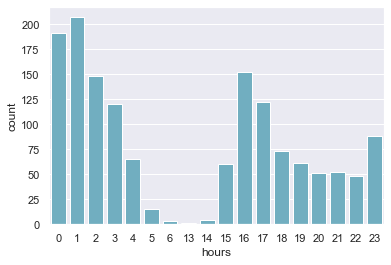

In [337]:
#Plottin hours
%matplotlib inline
fig,ax =plt.subplots()
sns.set_theme(style="darkgrid")
client_df['hours'] = client_df['created_at'].dt.hour
sns.countplot(x=client_df['hours'],color='c')
fig.savefig('hours.png')

<ipython-input-338-ba21f2717dff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df['hours'] = client_df['created_at'].dt.hour


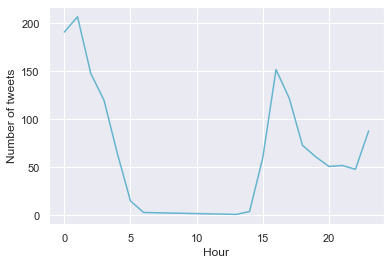

In [338]:
fig,ax =plt.subplots()
sns.set_theme(style="darkgrid")
client_df['hours'] = client_df['created_at'].dt.hour
height = client_df.groupby('hours')['tweet_id'].count()
ax = sns.lineplot(x=height.index,y=height,color='c')
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Hour')
fig.savefig('hours_varying.png')

### Days

<ipython-input-369-7f9228adfeb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client_df['days'] = client_df['created_at'].dt.day_name()


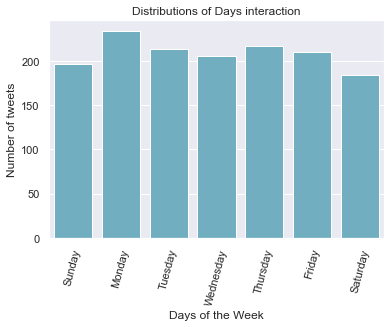

In [369]:
#Plotting days
fig,ax=plt.subplots()
sns.set_theme(style="darkgrid")
client_df['days'] = client_df['created_at'].dt.day_name()
ax = sns.countplot(x=client_df['days'],color='c',order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax.set_title('Distributions of Days interaction')
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Number of tweets')
ax.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],rotation=75)
fig.savefig('days.png')

### Types of devices

In [371]:
client_df.source.value_counts()

Twitter for iPhone    1435
Twitter Web Client      19
TweetDeck                7
Name: source, dtype: int64

## Dogs

### Types

In [372]:
dog_df.type.nunique()

111

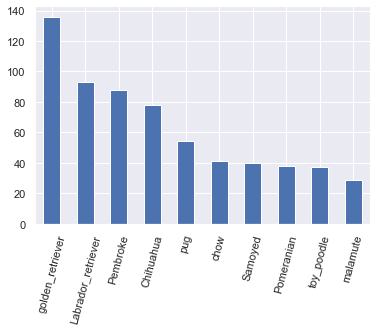

In [373]:
#PLotting counts for each dog type
fig,ax=plt.subplots()
sns.set_theme(style="darkgrid")
first_ten = dog_df['type'].value_counts()
ax = first_ten[:10].plot.bar(rot=75)
fig.savefig('types.png')

### Interaction with each stage

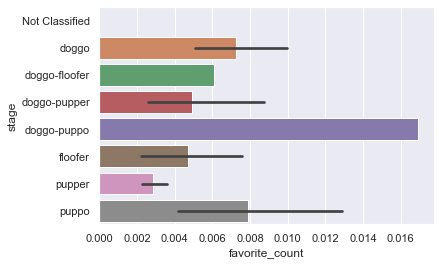

In [374]:
fig,ax =plt.subplots()
filtered.stage.unique()
ax = sns.barplot(y='stage',x='favorite_count',data=filtered)
fig.savefig('Interaction with stages.png')

### Reliability

<ipython-input-375-5d45613f2cfc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['rating_numerator'] = filtered['rating_numerator'] / sum(filtered.rating_numerator)
<ipython-input-375-5d45613f2cfc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['favorite_count'] = filtered['favorite_count']/sum(filtered.favorite_count)


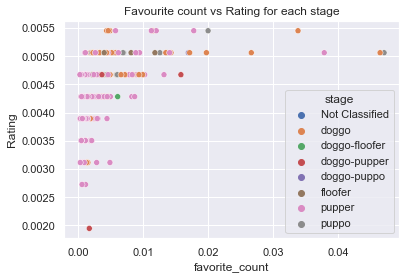

In [375]:
#Relation between favorite tweets and ratings
#As we are only interesting in the relation not the values it is better to use portions
fig, ax= plt.subplots()
sns.set_theme(style="darkgrid")
filtered = dog_df.query('stage != "Not Classified"')
filtered['rating_numerator'] = filtered['rating_numerator'] / sum(filtered.rating_numerator)
filtered['favorite_count'] = filtered['favorite_count']/sum(filtered.favorite_count)
ax = sns.scatterplot(data=filtered,x='favorite_count',y='rating_numerator',hue='stage')
ax.set_ylabel('Rating')
ax.set_title('Favourite count vs Rating for each stage')
fig.savefig("Favourite count vs Rating for each stage.png")
